In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("train20.csv", header=None)
train_data = np.array(train_data)

test_data1 = pd.read_csv("train20.csv",header=None)
test_data1 = np.array(test_data1)

test_data2 = pd.read_csv("test20.csv",header=None)
test_data2 = np.array(test_data2)


x_train = []
y_train = []
x_test1 = []
y_test1 = []
x_test2 = []
y_test2 = []

x_subtrain = []
y_subtrain = []
x_validation = []
y_validation = []

for i in range(len(train_data)):
    l1 = int((0.8)*(len(train_data)))
    # l2 = int((0.3)*(len(train_data)))

    if(i< l1):
        x_subtrain.append(train_data[i][0:2])
        y_subtrain.append(train_data[i][2])

    if(i> l1 or i==l1):
        x_validation.append(train_data[i][0:2])
        y_validation.append(train_data[i][2])    


for i in range(len(train_data)):
    x_train.append(train_data[i][0:2])
    y_train.append(train_data[i][2])
    
x_train = np.array(x_train)    
y_train = np.array(y_train)

for i in range(len(test_data1)):
    x_test1.append(test_data1[i][0:2])
    y_test1.append(test_data1[i][2])
    
x_test1 = np.array(x_test1)
y_test1 = np.array(y_test1) 

for i in range(len(test_data2)):
    x_test2.append(test_data2[i][0:2])
    y_test2.append(test_data2[i][2])
    
x_test2 = np.array(x_test2)
y_test2 = np.array(y_test2)


def plot_fun(ind,degree):
    trainx = []
    trainy = []
    if(ind ==1 ):
        trainx = x_subtrain
        trainy = y_subtrain
    elif(ind ==2):
        trainx = x_validation
        trainy = y_validation   
    # X = getmatrix(1,trainx)
    X = [find_arr(x,degree) for x in trainx]
    X = np.array(X)
    # X = np.asarray(X)
    beta = find_coeff_mat1(degree,trainx,trainy)
    Y_pred = np.dot(X,beta)
    X1 = list()
    X2 = list()
    for t in trainx:
        X1.append(t[0])
        X2.append(t[1])
    Y = np.asarray(trainy)

    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
    ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Value')
    if(ind ==1 ):
        ax.set_title('Model fit 3D scatter plot for Train data')
    elif(ind ==2):
        ax.set_title('Model fit 3D scatter plot for validation data')    
    ax.legend()
    plt.show()



def find_arr(x,degree):
        x1 = x[0]
        x2 = x[1]
        
        temp_list = []
        
        for i in range(degree+1):
            for j in range(i+1):
                temp_list.append(pow(x1,j)*pow(x2,i-j))
        
        return np.array(temp_list)

def modified_coeff_mat(degree,k):
    x_list =[find_arr(x,degree) for x in x_subtrain]

    #no_of_colums = int(((degree+2)*(degree+1))/2)

    X = np.array(x_list)
                
    y = y_subtrain

    #lambda_mat = float(k)*(np.identity(no_of_colums, dtype=float))
            
    temp_mat = np.dot(np.transpose(X),X)
    
    rows = len(temp_mat)
    columns = len(temp_mat[0])
    
    for i in range(rows):
        for j in range(columns):
            if(i == j):
                temp_mat[i][j] = temp_mat[i][j] + k
                          
    
    #mat1 = np.linalg.pinv(temp_mat + lambda_mat)
    mat1 = np.linalg.pinv(temp_mat)
    

    mat2 = np.transpose(X)

    mat3 = y

    coeff_mat = np.dot(mat1, np.dot(mat2, mat3))

    return coeff_mat

def find_coeff_mat1(degree,trainx, trainy):
    x_list =[find_arr(x,degree) for x in trainx]

    X = np.array(x_list) 
                
    y = trainy

    #upto here we got the matrix X and matrix y
                
    #now we are finding coefficient matrix
    mat1 = np.linalg.pinv(np.dot(np.transpose(X),X))
                
    mat2 = np.transpose(X)
                
    mat3 = y

    coeff_mat = np.dot(mat1, np.dot(mat2, mat3))
    
    return coeff_mat

def find_coeff_mat(degree):
    x_list =[find_arr(x,degree) for x in x_train]

    X = np.array(x_list) 
                
    y = y_train

    #upto here we got the matrix X and matrix y
                
    #now we are finding coefficient matrix
    mat1 = np.linalg.pinv(np.dot(np.transpose(X),X))
                
    mat2 = np.transpose(X)
                
    mat3 = y

    coeff_mat = np.dot(mat1, np.dot(mat2, mat3))
    
    return coeff_mat

def expected_output(x_test,degree,coeff_mat):
    y_actual = []
            
    for x in x_test:
        mat1 = np.array(find_arr(x,degree))  # mat 1X6 i.e 1 x1 x2 x1^2 X1X2 X2^2
        mat2 = coeff_mat   # coeff_mat 6X1
                
        y_actual.append(np.dot(mat1, mat2))
                
    y_actual = np.array(y_actual)

    return y_actual

def find_mse(x_test, y_test, degree):
        
        coeff_mat = find_coeff_mat(degree)
               
        y_actual = expected_output(x_test,degree, coeff_mat)
        
        #lets find MSE(mean square errors for the above) between y_actual and y_test
        no_of_items = len(y_test)
        sum =0
            
        for i in range(no_of_items):
            diff_square = pow((y_actual[i] - y_test[i]), 2)
            sum = sum + diff_square
                
        MSE = sum/no_of_items 

        return MSE

def find_modified_mse(x_test, y_test, degree,k):
     
    coeff_mat = modified_coeff_mat(degree,k)
    
    coeff_mat1 = find_coeff_mat(degree)
    # print(np.shape(coeff_mat1))

    y_actual = expected_output(x_test,degree, coeff_mat)

     #lets find MSE(mean square errors for the above) between y_actual and y_test
    no_of_items = len(y_test)
    sum =0
            
    for i in range(no_of_items):
        diff_square = pow((y_actual[i] - y_test[i]), 2)
        sum = sum + diff_square
                
        MSE = sum/no_of_items 
        

    return MSE

# print("coefficient matrix: ")
# print(find_coeff_mat(2))

# print("modified coeff matrix: ")
# print(modified_coeff_mat(2, 2))

 
def mse_vs_degree(x_test,y_test,ind):
    #step-1 first we have to find the best degree
    #so plot graph between degree and MSE 
    degree_1 = []
    mse_1 = []

    for degree in range(1,10):
        degree_1.append(degree)
        mse_1.append(find_mse(x_test,y_test,degree))
        
    fig = plt.figure(figsize=(4, 3))    
    plt.plot(degree_1, mse_1)
    plt.xlabel('Degree')
    plt.ylabel('MSE')
    if(ind ==1):
        plt.title("degree vs MSE for train data")
    else:
        plt.title("degree vs MSE for validation data")
    plt.show()   

    #therefore form the above the best possible  occurs at degree 3

    #scatter graph for best possible output vs  output for train data set

def bestmodel_vs_expected():    

    cf_mat = find_coeff_mat(3)

    exp_y_train = y_train
    best_poss_train = expected_output(x_test1,3,cf_mat)

    fig = plt.figure(figsize=(4, 3))

    plt.scatter(best_poss_train,exp_y_train)
    plt.xlabel('best model output for train data')
    plt.ylabel('expected output for train data')
    plt.title("best model output vs expected output for train data")
    plt.show()

    #scatter graph for best possible  output vs output for test data set

    exp_y_test = y_test2
    best_poss_test = expected_output(x_test2,3,cf_mat)
    
    fig = plt.figure(figsize=(4, 3))
 
    plt.scatter(best_poss_test, exp_y_test)
    plt.xlabel('best moddel output for test data')
    plt.ylabel('expected output for test data')
    plt.title("best model output vs expected output for test data")
    plt.show()

def error_report():
        #error report for train data
        train_mse = find_mse(x_test1,y_test1,3)
        print("MSE for train data is : ",train_mse)

        test_mse = find_mse(x_test2, y_test2, 3)
        print("MSE for test data is : ",test_mse)    
        

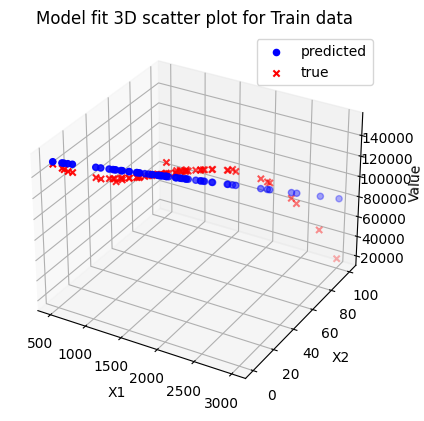

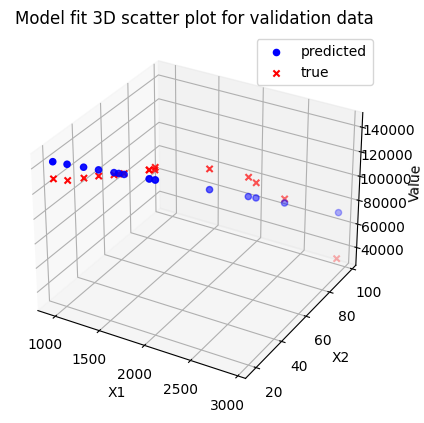

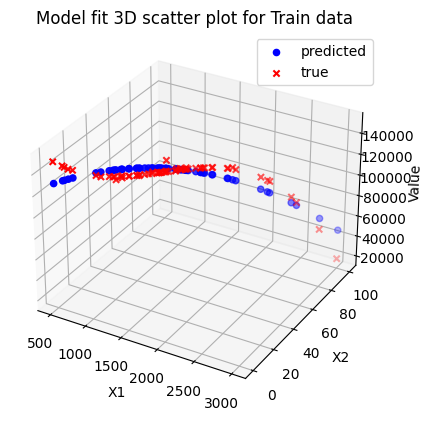

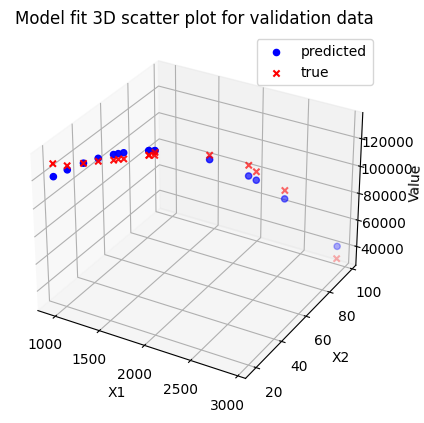

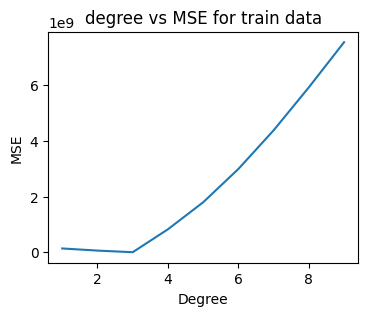

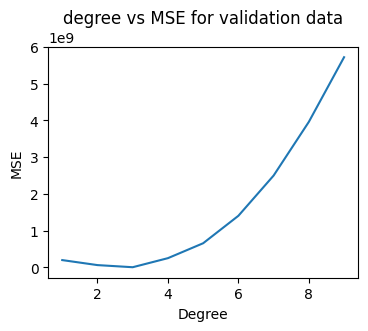

MSE for train data is :  1793055.2849815355
MSE for test data is :  474281.7115487503


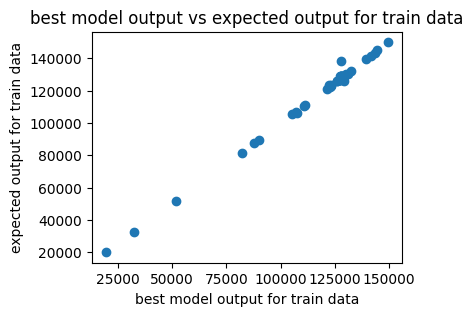

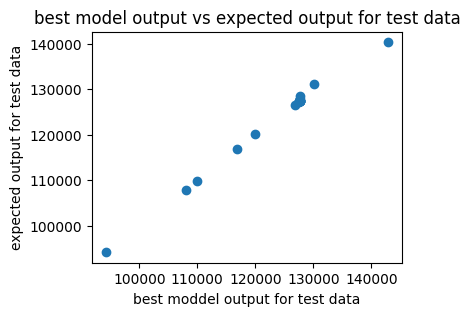

In [11]:
plot_fun(1,1)
plot_fun(2,1)

#for degree 2
plot_fun(1,2)
plot_fun(2,2)

mse_vs_degree(x_subtrain, y_subtrain,1)
mse_vs_degree(x_validation,y_validation,2)

#error report for train and test data
error_report()

bestmodel_vs_expected()

#Report observations for the above plots


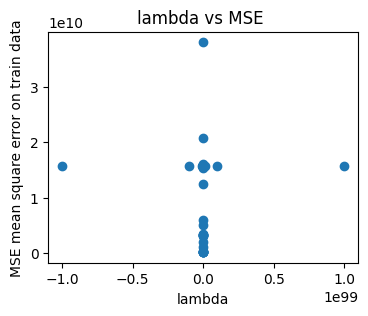

MSE for train data is :  149591348.23539045
MSE for test data is :   55806720.35376849


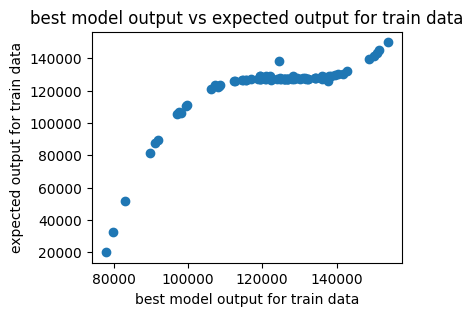

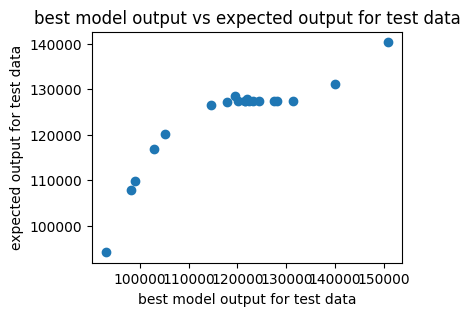

In [12]:
import numpy as np
import base
import matplotlib.pyplot as plt
from numpy.random import randint

degree = 1

mse_result_subtrain = []
lambda_list = []

# for k in range(1,10):
#     mse_result_train.append(find_modified_mse(x_test1, y_test1, degree, k-10))
#     lambda_list.append(k-10)
values = randint(-100,100,100)
#denom = np.random.uniform(low=-100, high=100, size=(100,)) 
#print(denom)

for k in range(len(values)):
    mse_result_subtrain.append(find_modified_mse(x_subtrain, y_subtrain, degree,10**k))
    mse_result_subtrain.append(find_modified_mse(x_subtrain, y_subtrain, degree,-(10**k)))
    lambda_list.append(10**k)
    lambda_list.append(-(10**k))

mse_array = np.array(mse_result_subtrain)
lambda_array = np.array(lambda_list)

# print("mse array: ")
# print(mse_array)

fig = plt.figure(figsize=(4, 3))
plt.scatter(lambda_array,mse_array)
plt.xlabel('lambda')
plt.ylabel('MSE mean square error on train data')
plt.title("lambda vs MSE ")
plt.show()


#error report for train and test data
best_lamda = 0
mse_train = find_modified_mse(x_test1,y_test1, degree, 0)
mse_test  = find_modified_mse(x_test2,y_test2, degree, 0)

print("MSE for train data is : ", mse_train)
print("MSE for test data is :  ", mse_test)

#scatter plot for best model output vs expected output for both train and test data
#for train data set

coeff_mat = find_coeff_mat(degree)

y_expected_train = y_test1
y_best_actual_train   = expected_output(x_test1,degree, coeff_mat)

fig = plt.figure(figsize=(4, 3))
plt.scatter(y_best_actual_train, y_expected_train)
plt.xlabel('best model output for train data')
plt.ylabel('expected output for train data')
plt.title("best model output vs expected output for train data")
plt.show()

#for test data
y_expected_test = y_test2
y_best_actual_test = expected_output(x_test2, degree, coeff_mat)

fig = plt.figure(figsize=(4, 3))
plt.scatter(y_best_actual_test, y_expected_test)
plt.xlabel('best model output for test data')
plt.ylabel('expected output for test data')
plt.title("best model output vs expected output for test data")
plt.show()

